In [ ]:
import sys
import os


sys.path.append(os.path.abspath("../src"))  

import pandas as pd

from src.config import ANALYSIS_PATH

my_analysis_path = '/home/gus/Documents/REPOS/tmt-analysis/data/hand_analysis/2025-05-05_13-05-32/analysis.csv'

df = pd.read_csv(my_analysis_path)

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

def split_subjectwise_evaluation_set_stratified(df, subject_col='subject_id', group_col='group', test_size=0.2, random_state=42):
    """
    Splits a dataset into training and evaluation sets, stratifying by group at the subject level.

    Parameters:
    - df: pandas DataFrame containing the dataset.
    - subject_col: column name that identifies each subject.
    - group_col: column name used for stratification (e.g., 'group').
    - test_size: proportion of subjects to include in the evaluation set.
    - random_state: seed for reproducibility.

    Returns:
    - df_train: DataFrame with training data.
    - df_eval: DataFrame with evaluation data.
    """
    # Get unique subjects and their group labels
    subject_group_df = df[[subject_col, group_col]].drop_duplicates()

    # Stratified split based on group label
    train_subjects, eval_subjects = train_test_split(
        subject_group_df[subject_col],
        test_size=test_size,
        stratify=subject_group_df[group_col],
        random_state=random_state
    )

    # Select rows from the original dataframe
    df_train = df[df[subject_col].isin(train_subjects)].copy()
    df_eval = df[df[subject_col].isin(eval_subjects)].copy()

    return df_train, df_eval


In [9]:
df.describe()

,subject_id,trial_id,trial_order_of_appearance,speed_threshold,total_distance,rt,correct_targets_touches,wrong_targets_touches,mean_speed,std_speed,...,hesitation_avg_speed,travel_avg_speed,search_avg_speed,state_transitions,hesitation_ratio,total_hesitations,average_duration,max_duration,number_of_crosses,age
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1335.000000,1335.000000,1335.000000,1335.000000,...,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.0,1800.000000
mean,48.922222,9.950000,11.500000,0.193654,2.911585,22185.213333,13.781273,3.850187,0.219628,0.339426,...,0.200886,0.467852,0.160881,26.922846,0.241732,2.688390,0.516188,0.961881,0.0,72.455556
std,28.788480,6.369461,5.767884,0.060506,1.876333,3703.229732,1.738559,2.958235,0.064683,0.094905,...,0.168376,0.108106,0.054495,4.640530,0.205308,2.430807,0.601248,1.207564,0.0,9.757665
min,1.000000,0.000000,2.000000,0.070343,0.000000,9510.000000,10.000000,0.000000,0.074673,0.140352,...,0.000000,0.202578,0.051536,14.000000,0.000000,0.000000,0.000000,0.000000,0.0,50.000000
25%,23.000000,4.750000,6.750000,0.144987,0.000000,19342.000000,12.000000,2.000000,0.172810,0.275981,...,0.087845,0.391413,0.119538,24.000000,0.055794,1.000000,0.134438,0.166634,0.0,67.000000
50%,48.500000,9.500000,11.500000,0.182481,3.558508,25001.000000,15.000000,3.000000,0.212944,0.325576,...,0.173320,0.458467,0.154854,27.000000,0.206735,2.000000,0.359495,0.600193,0.0,74.500000
75%,73.000000,15.250000,16.250000,0.235446,4.027664,25015.250000,15.000000,5.000000,0.258815,0.381774,...,0.282400,0.537458,0.192831,30.000000,0.396111,4.000000,0.683917,1.301356,0.0,80.000000
max,99.000000,21.000000,21.000000,0.382529,10.055361,25787.000000,15.000000,26.000000,0.530780,1.196486,...,1.668830,1.006830,0.393720,49.000000,0.814484,16.000000,7.200076,9.933398,0.0,90.000000


In [10]:
train_df, eval_df = split_subjectwise_evaluation_set_stratified(df, test_size=0.2)
train_df, eval_df

(      subject_id  trial_id trial_type  is_valid  trial_order_of_appearance  \
 0              1         8     PART_A      True                          2   
 1              1         7     PART_B      True                          3   
 2              1        11     PART_A      True                          4   
 3              1        21     PART_B      True                          5   
 4              1         1     PART_A      True                          6   
 ...          ...       ...        ...       ...                        ...   
 1795          99         0     PART_B      True                         17   
 1796          99        21     PART_A      True                         18   
 1797          99         3     PART_B      True                         19   
 1798          99         8     PART_A      True                         20   
 1799          99         4     PART_B      True                         21   
 
       speed_threshold  total_distance     rt  cor

In [11]:
train_df['group'].value_counts(normalize=True), eval_df['group'].value_counts(normalize=True)

(group
 MCI    0.569444
 HC     0.430556
 Name: proportion, dtype: float64,
 group
 MCI    0.555556
 HC     0.444444
 Name: proportion, dtype: float64)

In [12]:
#get unique subjects by group
train_df



,subject_id,trial_id,trial_type,is_valid,trial_order_of_appearance,speed_threshold,total_distance,rt,correct_targets_touches,wrong_targets_touches,...,hesitation_ratio,total_hesitations,average_duration,max_duration,hesitation_periods,number_of_crosses,invalid_cause,sex,age,group
0,1,8,PART_A,True,2,0.262139,3.756078,18105,15.0,3.0,...,0.654418,1.0,4.333857,4.333857,[4.333857099999932],0.0,NaN,F,52,HC
1,1,7,PART_B,True,3,0.262139,3.451943,18091,15.0,3.0,...,0.203475,1.0,0.735873,0.735873,[0.7358727999999246],0.0,NaN,F,52,HC
2,1,11,PART_A,True,4,0.262139,3.522551,15807,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC
3,1,21,PART_B,True,5,0.262139,3.349920,21544,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC
4,1,1,PART_A,True,6,0.262139,3.910085,18099,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,99,0,PART_B,True,17,0.139271,3.614743,18984,15.0,2.0,...,0.000000,0.0,0.000000,0.000000,[],0.0,NaN,F,71,MCI
1796,99,21,PART_A,True,18,0.139271,5.412710,21924,15.0,12.0,...,0.497201,5.0,0.780583,1.766734,"[0.3000841001048684, 1.766733500175178, 1.4024...",0.0,NaN,F,71,MCI
1797,99,3,PART_B,True,19,0.139271,3.662643,18612,15.0,3.0,...,0.019453,1.0,0.069026,0.069026,[0.06902600033208728],0.0,NaN,F,71,MCI
1798,99,8,PART_A,True,20,0.139271,4.016559,16072,15.0,1.0,...,0.175622,1.0,0.733461,0.733461,[0.7334607001394033],0.0,NaN,F,71,MCI


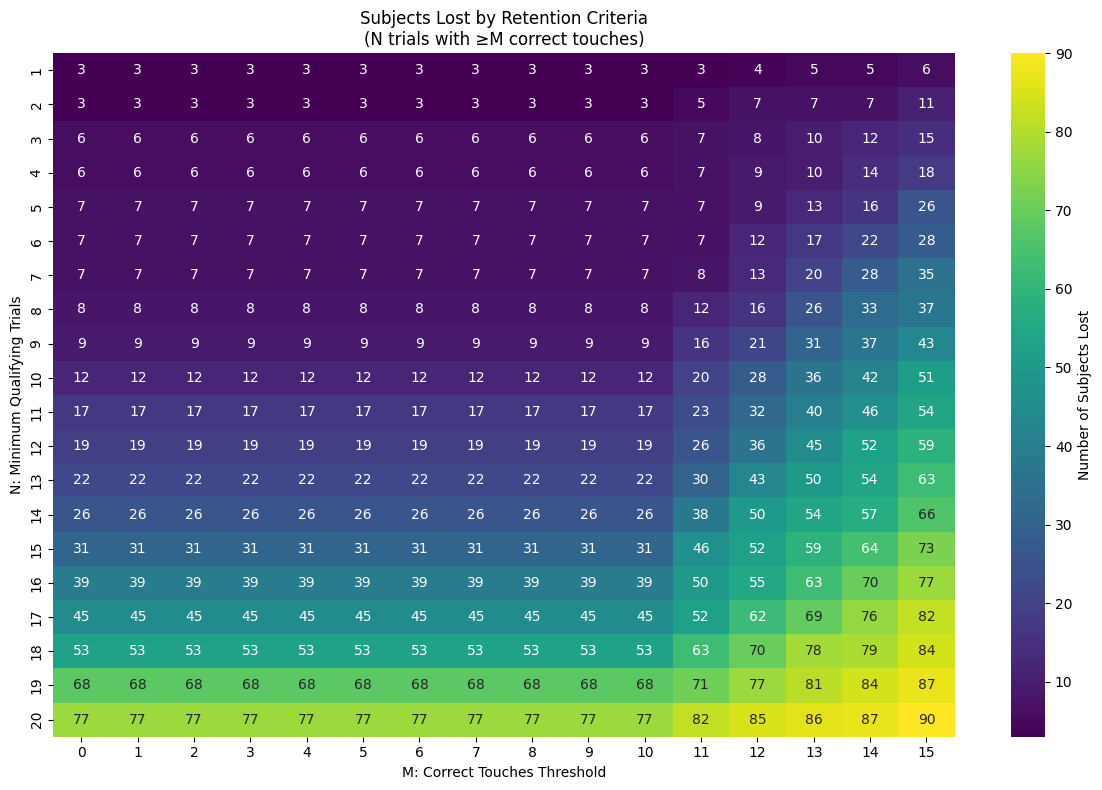

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

subjects = df['subject_id'].unique()
total_subjects = len(subjects)

# Maximum number of trials per subject (should be 15)
max_trials = df['trial_id'].nunique()

# Prepare a grid for N (required number of qualifying trials) and M (threshold correct touches)
N_values = range(1, max_trials + 1)  # 1 through 15
M_values = range(0, 16)  # 0 through 15 possible touches

# Initialize a DataFrame to store the number of subjects lost for each (N, M)
lost_matrix = pd.DataFrame(index=N_values, columns=M_values)

# Precompute per-subject counts for each M threshold
# subject_counts[M] = number of trials where correct_targets_touches >= M
subject_counts = pd.DataFrame(index=subjects, columns=M_values)

for M in M_values:
    counts = df.groupby('subject_id')['correct_targets_touches'] \
        .apply(lambda touches: (touches >= M).sum())
    subject_counts[M] = counts

# Compute lost subjects for each (N, M)
for N in N_values:
    for M in M_values:
        retained = (subject_counts[M] >= N).sum()
        lost = total_subjects - retained
        lost_matrix.at[N, M] = lost

# Plot heatmap of lost subjects
plt.figure(figsize=(12, 8))
sns.heatmap(
    lost_matrix.astype(int),
    annot=True,
    fmt="d",
    cmap="viridis",
    cbar_kws={'label': 'Number of Subjects Lost'}
)
plt.title('Subjects Lost by Retention Criteria\n(N trials with ≥M correct touches)')
plt.xlabel('M: Correct Touches Threshold')
plt.ylabel('N: Minimum Qualifying Trials')
plt.tight_layout()
plt.show()

In [49]:
df.head(23)


,subject_id,trial_id,trial_type,is_valid,trial_order_of_appearance,speed_threshold,total_distance,rt,correct_targets_touches,wrong_targets_touches,...,total_hesitations,average_duration,max_duration,hesitation_periods,number_of_crosses,invalid_cause,sex,age,group,percent_correct
0,1,8,PART_A,True,2,0.262139,3.756078,18105,15.0,3.0,...,1.0,4.333857,4.333857,[4.333857099999932],0.0,NaN,F,52,HC,100.000000
1,1,7,PART_B,True,3,0.262139,3.451943,18091,15.0,3.0,...,1.0,0.735873,0.735873,[0.7358727999999246],0.0,NaN,F,52,HC,100.000000
2,1,11,PART_A,True,4,0.262139,3.522551,15807,15.0,4.0,...,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC,100.000000
3,1,21,PART_B,True,5,0.262139,3.349920,21544,15.0,4.0,...,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC,100.000000
4,1,1,PART_A,True,6,0.262139,3.910085,18099,15.0,4.0,...,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC,100.000000
5,1,0,PART_B,True,7,0.262139,3.425304,18114,15.0,2.0,...,1.0,0.100003,0.100003,[0.10000330000002577],0.0,NaN,F,52,HC,100.000000
6,1,10,PART_A,True,8,0.262139,3.830191,19143,15.0,6.0,...,2.0,0.234570,0.300226,"[0.3002257999999074, 0.1689137999999275]",0.0,NaN,F,52,HC,100.000000
7,1,5,PART_B,True,9,0.262139,3.447138,19562,15.0,6.0,...,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC,100.000000
8,1,15,PART_A,True,10,0.262139,3.709000,15564,15.0,4.0,...,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC,100.000000
9,1,17,PART_B,True,11,0.262139,3.199153,17694,15.0,4.0,...,0.0,0.000000,0.000000,[],0.0,NaN,F,52,HC,100.000000


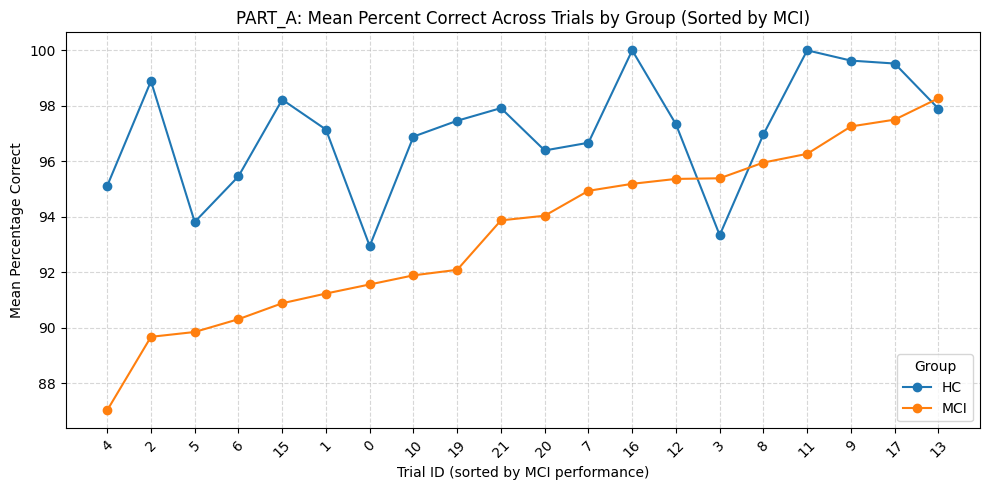

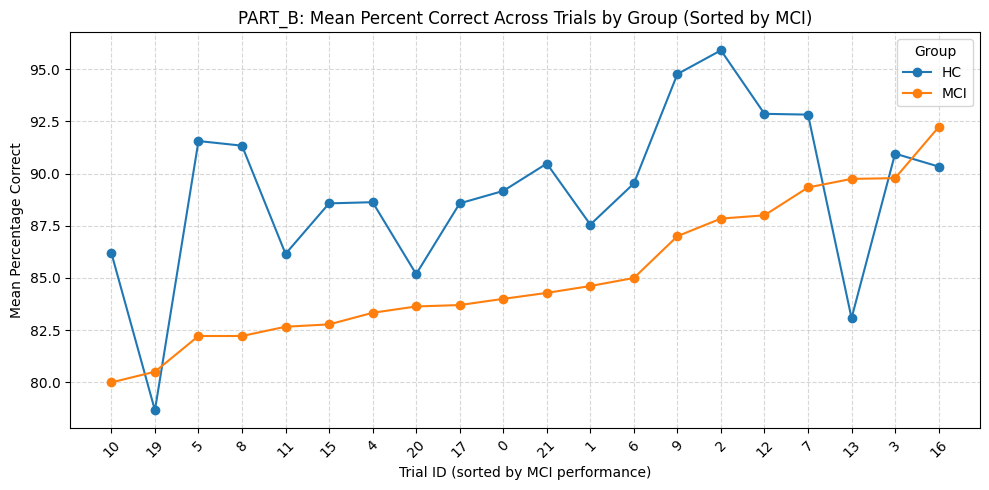

In [44]:
import matplotlib.pyplot as plt

# Compute percent correct
df['percent_correct'] = df['correct_targets_touches'] / 15 * 100

# Iterate over both trial types
for trial_type in ['PART_A', 'PART_B']:
    # Filter
    df_part = df[df['trial_type'] == trial_type]

    # Group and pivot
    mean_df = df_part.groupby(['trial_id', 'group'])['percent_correct'].mean().unstack('group')

    # Sort by MCI performance
    mean_df_sorted = mean_df.sort_values(by='MCI')

    # Get sorted trial IDs
    sorted_trial_ids = mean_df_sorted.index.tolist()

    # Plot
    plt.figure(figsize=(10, 5))
    for group in mean_df_sorted.columns:
        plt.plot(range(len(mean_df_sorted)), mean_df_sorted[group], marker='o', label=group)

    plt.xticks(ticks=range(len(sorted_trial_ids)), labels=sorted_trial_ids, rotation=45)
    plt.xlabel('Trial ID (sorted by MCI performance)')
    plt.ylabel('Mean Percentage Correct')
    plt.title(f'{trial_type}: Mean Percent Correct Across Trials by Group (Sorted by MCI)')
    plt.legend(title='Group')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


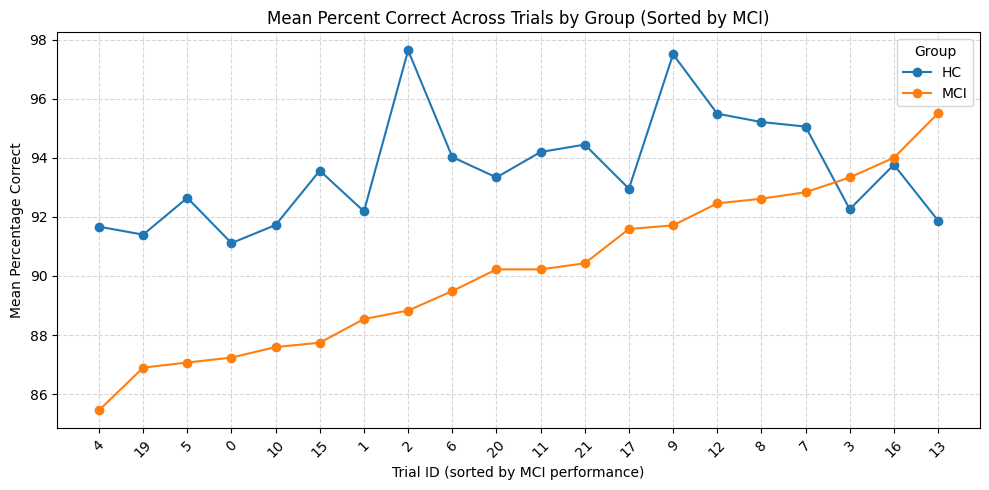

In [40]:
import matplotlib.pyplot as plt

# Sort by MCI performance
mean_df_sorted = mean_df.sort_values(by='MCI')

# Get sorted trial IDs for relabeling
sorted_trial_ids = mean_df_sorted.index.tolist()

# Plot with reordered x-axis
plt.figure(figsize=(10, 5))
for group in mean_df_sorted.columns:
    plt.plot(range(len(mean_df_sorted)), mean_df_sorted[group], marker='o', label=group)

plt.xticks(ticks=range(len(sorted_trial_ids)), labels=sorted_trial_ids, rotation=45)
plt.xlabel('Trial ID (sorted by MCI performance)')
plt.ylabel('Mean Percentage Correct')
plt.title('Mean Percent Correct Across Trials by Group (Sorted by MCI)')
plt.legend(title='Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



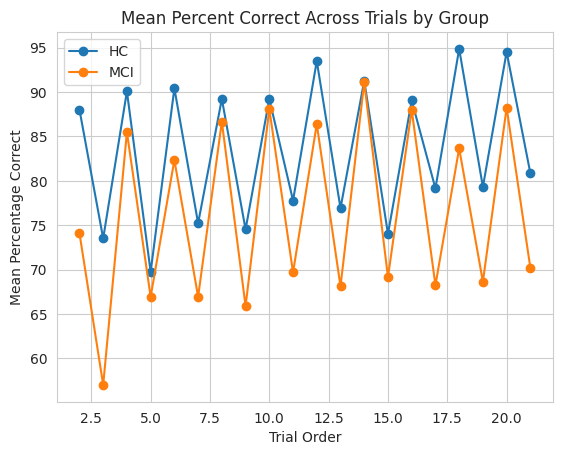

In [10]:
mean_df = df.groupby(['trial_order_of_appearance', 'group'])['percent_correct'].mean().unstack('group')

plt.figure()
for g in mean_df.columns:
    plt.plot(mean_df.index, mean_df[g], marker='o', label=g)
plt.xlabel('Trial Order')
plt.ylabel('Mean Percentage Correct')
plt.title('Mean Percent Correct Across Trials by Group')
plt.legend()
plt.show()

In [20]:
#print unique trial_order_of_appearance

df['trial_order_of_appearance'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

In [21]:
#print unique trial_order_of_appearance

sorted(df['trial_id'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21]